In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import time

Connect to google drive to access the covid dataset:

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# drive/MyDrive/data ADA project/
%cd drive/MyDrive/data ADA project/

[Errno 2] No such file or directory: 'drive/MyDrive/data ADA project/'
/content/drive/.shortcut-targets-by-id/1DMt9AR9J7QnOcoHE9gj-a0giuk_L8XuI/data ADA project


In [148]:
# Run this cell to know where you are situated
!ls

 aggregated_timeseries.json	      game_daily_pageviews.csv	  'Raw Data.csv'
 applemobilitytrends-2020-04-20.csv   Global_Mobility_Report.csv   Tagged-Data-Final.csv
'Cleaned Data 2.csv'		      interventions.csv		   topics_linked.csv


In [149]:
df_interventions = pd.read_csv("interventions.csv")
# df_interventions = pd.read_csv('./Corona/data/interventions.csv') #Comment by Zhuofu: I changed this line as I cannot access to your drive

In [150]:
df_interventions[df_interventions['lang'] == 'de'].head()

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10


In [151]:
df_mobility = pd.read_csv("Global_Mobility_Report.csv")
# df_mobility = pd.read_csv('./Corona/data/Global_Mobility_Report.csv') #Comment by Zhuofu: I changed this line as I cannot access to your drive

<ipython-input-151-fed29d68be52>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mobility = pd.read_csv("Global_Mobility_Report.csv")


In [152]:
df_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [153]:
df_mobility['date']

# Convert the date column to datetime
df = pd.to_datetime(df_mobility['date'])

# Find the latest date
latest_date = df.max()
# Find the earliest date
earliest_date = df.min()

print(latest_date, earliest_date)

2020-08-25 00:00:00 2020-02-15 00:00:00


Top 10 games to play during the pandemic:
https://www.latimes.com/entertainment-arts/story/2020-12-10/10-best-games-of-2020-pandemic-year-play-critical-storytelling-medium

2020 in Video Games Wikipedia: https://en.wikipedia.org/wiki/2020_in_video_games

In [154]:
# Retrieve page views for the entire wikipedia for a particular country:
country_code = ['en', 'fr', 'it', 'de']
start_dt = '2019100100' #Start day of the search
end_dt = '2020123100' #End day of the search
headers = {'User-Agent':'ADABot/0.0 (floydchow7@gmail.com)'}

In [155]:
df_overall_views = pd.DataFrame()

for country in country_code:
  url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{country}.wikipedia/all-access/user/daily/{start_dt}/{end_dt}'
  try:
    r = requests.get(url, headers=headers)
    df_onequery = pd.DataFrame(r.json()['items'])
    df_overall_views = pd.concat([df_overall_views,df_onequery])
    time.sleep(0.5) # In case the IP address is blocked
  except:
    print('The {} page views are not found during these time'.format(country))

In [156]:
df_overall_views

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,all-access,user,daily,2019100100,259001639
1,en.wikipedia,all-access,user,daily,2019100200,258600056
2,en.wikipedia,all-access,user,daily,2019100300,255368417
3,en.wikipedia,all-access,user,daily,2019100400,248365937
4,en.wikipedia,all-access,user,daily,2019100500,249282219
...,...,...,...,...,...,...
453,de.wikipedia,all-access,user,daily,2020122700,38317737
454,de.wikipedia,all-access,user,daily,2020122800,35339418
455,de.wikipedia,all-access,user,daily,2020122900,34815984
456,de.wikipedia,all-access,user,daily,2020123000,33390721


In [157]:
df_overall_pageviews = df_overall_views[['project', 'timestamp', 'views']].reset_index(drop=True)
df_overall_pageviews['project'] = df_overall_pageviews['project'].str.replace(r'\..*', '', regex=True)
df_overall_pageviews['timestamp'] = pd.to_datetime(df_overall_pageviews['timestamp'], format='%Y%m%d%H')
df_overall_pageviews = df_overall_pageviews.pivot_table(index = 'timestamp', columns = ['project'], values = 'views')

In [158]:
df_overall_pageviews.head()

project,de,en,fr,it
timestamp,,,,
2019-10-01,29709920,259001639,23763367,16792385
2019-10-02,29827579,258600056,23777746,16936293
2019-10-03,32357487,255368417,22641775,16940724
2019-10-04,30576839,248365937,21440185,16375449
2019-10-05,29287426,249282219,21979392,16729406


In [159]:
from scipy.interpolate import UnivariateSpline

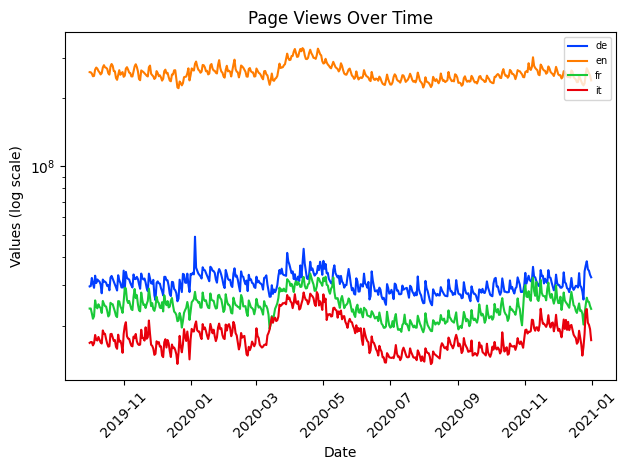

In [160]:
# Choose a color palette from seaborn
color_palette = sns.color_palette("bright", len(df_overall_pageviews.columns))

# Convert the color palette to a list
list_of_colors = color_palette.as_hex()

for column, color in zip(df_overall_pageviews.columns, list_of_colors):
  plt.plot(df_overall_pageviews.index, df_overall_pageviews[column], label=f'{column[:2]}', color=color)

plt.yscale('log')
plt.legend(loc='upper right',fontsize=7)
plt.xlabel('Date')
plt.ylabel('Values (log scale)')
plt.title(f'Page Views Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
main_url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/'
languages = ['en','de', 'fr', 'it'] #English, German, Russian, Spanish, French, Portuguese, Italian
games = ['Grand Theft Auto V', 'Fortnite', 'Minecraft', 'Call of Duty', 'The Last of Us', 'Plague Inc.', 'Uno', ] # Name of the games
daily = '/daily/'
#url_format: 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/an.wikipedia/all-access/user/{PAGENAME}/daily/2023102500/2023111400'

In [162]:
df = pd.DataFrame(columns=['project', 'article', 'granularity', 'timestamp', 'access', 'agent','views'])
for language in languages:
    for game in games:
        try:
            url = main_url + language + '.wikipedia/all-access/user/' + game + daily + start_dt + '/' + end_dt
            r = requests.get(url,headers=headers)
            df_onequery = pd.DataFrame(r.json()['items'])
            df = pd.concat([df,df_onequery])
            time.sleep(0.1) # In case the IP address is blocked
        except:
            print('The {} page of {} is not found during these time'.format(language,game))

df = df[['project', 'article', 'timestamp','views']].reset_index(drop=True)
df['project'] = df['project'].str.replace(r'\..*', '', regex=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H')
# df

In [163]:
df_pageviews = df.pivot_table(index = 'timestamp', columns = ['article', 'project'], values = 'views')

In [164]:
new_names = ['Game Name', 'Language']
df_pageviews.columns.set_names(new_names, level=[0, 1], inplace=True)

In [165]:
df_pageviews.head()

Game Name  Call_of_Duty                         Fortnite                  \
Language             de       en      fr     it       de      en      fr   
timestamp                                                                  
2019-10-01       1105.0  10086.0   970.0  583.0   1181.0  5705.0  1048.0   
2019-10-02       1129.0   9068.0   888.0  605.0   1327.0  5531.0  1118.0   
2019-10-03       1294.0   8582.0   851.0  627.0   1307.0  5512.0   958.0   
2019-10-04       1339.0   8978.0   946.0  692.0   1281.0  6138.0  1692.0   
2019-10-05       1332.0   9085.0  1097.0  710.0   1541.0  5884.0  1616.0   

Game Name         Grand_Theft_Auto_V          ... Plague_Inc.        \
Language       it                 de      en  ...          fr    it   
timestamp                                     ...                     
2019-10-01  568.0              779.0  4723.0  ...        10.0  10.0   
2019-10-02  633.0             2198.0  4874.0  ...        12.0   8.0   
2019-10-03  570.0             1179.0  4854.0  ...         6.0  20.0   
2019-10-04  522.0              977.0  5798.0  ...         7.0  10.0   
2019-10-05  662.0              866.0  5807.0  ...         6.0   9.0   

Game Name  The_Last_of_Us                            Uno                    
Language               de       en      fr      it    de    en     fr   it  
timestamp                                                                   
2019-10-01         1323.0   9211.0   869.0  1393.0  25.0  76.0  263.0  4.0  
2019-10-02         1493.0  10673.0  1000.0  1603.0  29.0  76.0  380.0  7.0  
2019-10-03         1959.0   9887.0   872.0  1631.0  28.0  71.0  289.0  4.0  
2019-10-04         1595.0   8719.0   900.0  1540.0  33.0  67.0  333.0  6.0  
2019-10-05         1549.0   8894.0   956.0  1576.0  30.0  71.0  502.0  3.0  

[5 rows x 28 columns]

In [166]:
df_pageviews.to_csv('./game_daily_pageviews.csv')

In [167]:
df_interventions

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10
3,it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26
4,nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaN,2020-03-16,2020-05-29
5,no,2020-02-26,2020-02-26,2020-03-13,2020-03-12,2020-03-24,2020-03-11,2020-06-04
6,sr,2020-03-06,2020-03-20,2020-03-15,2020-03-21,2020-03-21,2020-03-16,2020-05-02
7,sv,2020-01-31,2020-03-11,2020-03-18,2020-03-12,NaN,2020-03-11,2020-06-05
8,ko,2020-01-20,2020-02-20,2020-02-23,NaN,NaN,2020-02-25,2020-04-15
9,ca,2020-01-31,2020-02-13,2020-03-12,2020-03-08,2020-03-14,2020-03-16,NaN


# Plot for a specific game:


In [168]:
# reset
import datetime

In [169]:
type(df_pageviews.index)
type(pd.to_datetime('2019100100', format='%Y%m%d%H'))

pandas._libs.tslibs.timestamps.Timestamp

In [170]:
from matplotlib.widgets import Button, RadioButtons, CheckButtons

In [171]:
def return_game_figure(column_name, df):

  fig, ax = plt.subplots(figsize=(15, 4))

  # column_name = column_name.replace(' ', '_')
  filtered_df = df[[column_name.replace(' ', '_')]]
  # filtered_df = filtered_df[10:20]


  # Choose a color palette from seaborn
  color_palette = sns.color_palette("bright", len(filtered_df.columns))

  # Convert the color palette to a list
  list_of_colors = color_palette.as_hex()

  # Plotting each column
  for column, color in zip(filtered_df.columns, list_of_colors):
      df_lang = df_interventions[df_interventions['lang']==column[1]]
      if not df_lang.empty:
        ax.plot(filtered_df.index, filtered_df[column], label=f'{column[0]} ({column[1]})', color=color)
        start_index = df_lang['Mobility'].item()
        end_index = df_lang['Normalcy'].item()
        limits_df = filtered_df.loc[start_index:end_index]
        ax.plot(limits_df.index, limits_df[column], color=color, linewidth=3)

  # df_en = df_interventions[df_interventions['lang']=='en']
  # plt.axvline(x=df_en['Mobility'], label='Mobility', color = 'r')
  # plt.axvline(x=df_en['Normalcy'], label='Normalcy', color = 'y')

  # Adding legend, labels, and title
  ax.set_yscale('log')
  ax.legend(loc='upper right',fontsize=7)
  ax.set_xlabel('Date')
  ax.set_ylabel('Values (log scale)')
  ax.set_title(f'Page Views Over Time for {column_name}')
  return fig

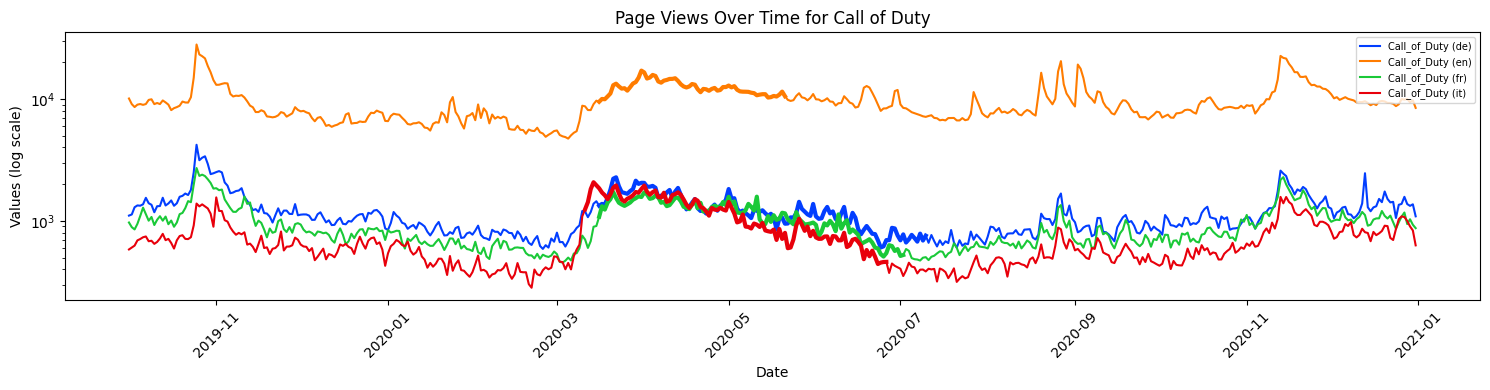

In [172]:
fig = return_game_figure('Call of Duty', df_pageviews)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grand Theft Auto V
Fortnite
Minecraft
Call of Duty
The Last of Us
Plague Inc.
Uno


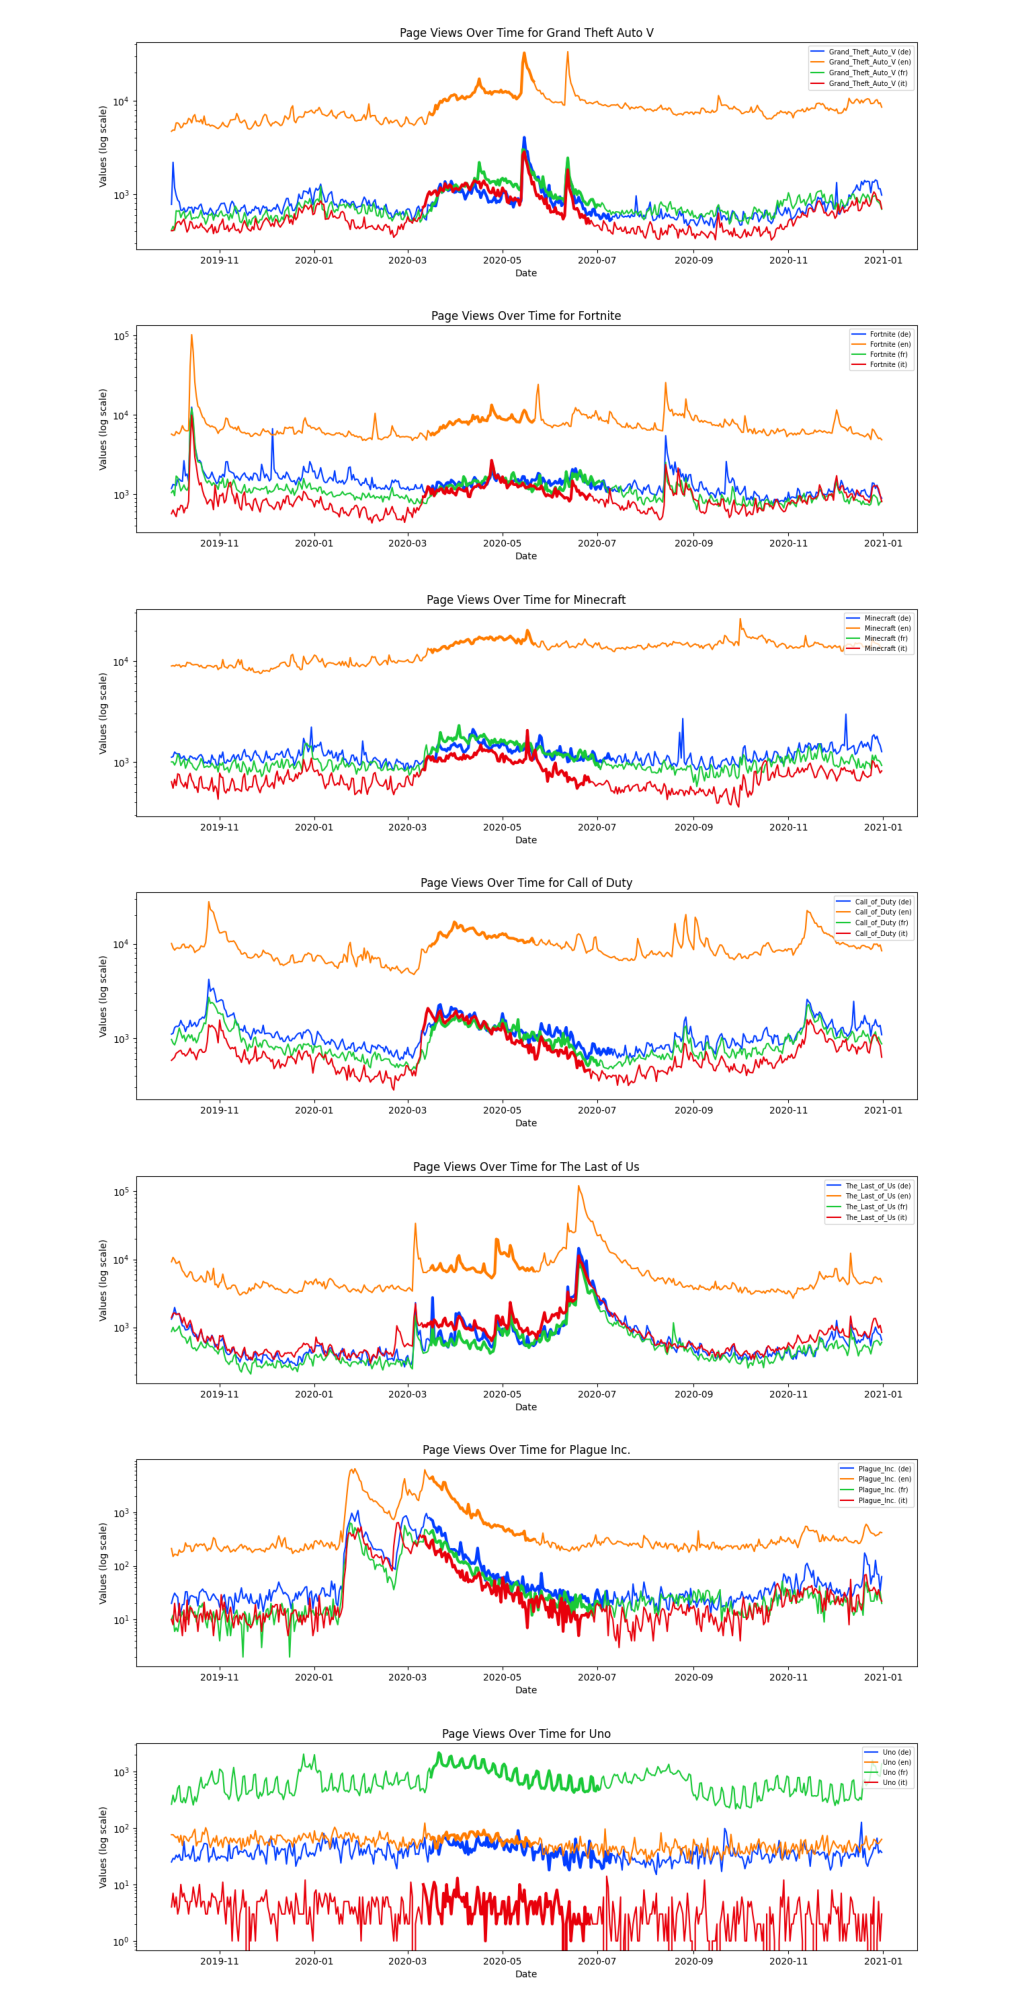

In [173]:
# Filter the DataFrame
start_date = '2020-01-01'
end_date = '2020-12-12'
df_plot = df_pageviews.loc[start_date:end_date]

# Filter for the games you want
# input_ = input(f"Enter the game to plot (in {games}): ")
# game_to_plot = input_.replace(' ', '_')

# game_to_plot = 'Minecraft'

# fig = plt.figure(return_game_figure(game_to_plot))
# fig1 = plt.figure(return_game_figure('Call of Duty'))

fig, axes = plt.subplots(len(games), 1, figsize=(32, 20))

# Loop through the subplots and create and plot each figure
for i, ax in enumerate(axes):
    df_plot = df_pageviews.loc[start_date:end_date]
    if i<len(games):
        title = games[i]
        print(title)
        fig_to_plot = return_game_figure(title, df_pageviews)
        sub_ax = fig_to_plot.get_axes()[0]
        sub_ax.get_figure().canvas.draw()
        buf = sub_ax.get_figure().canvas.renderer.buffer_rgba()
        plt.close(fig_to_plot)
        ax.imshow(buf)
        ax.axis('off')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
fig.tight_layout() # Adjusts the plot to ensure everything fits without overlapping
plt.show()

We should figure out if the growth in pageviews for games was greater than the one for wikipedia. Were video games especially interesting during the pandemic?

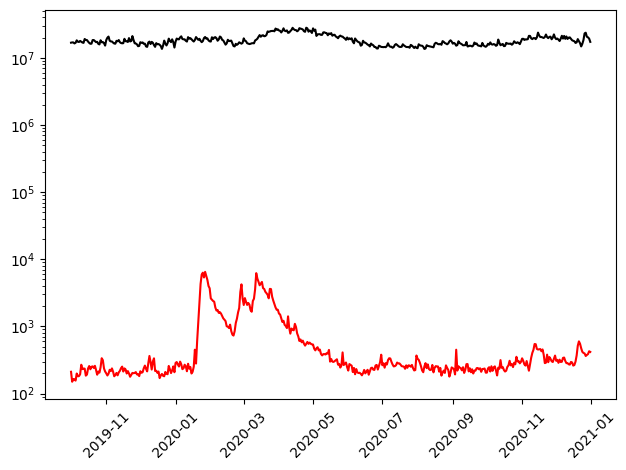

In [174]:
language = 'it'
game = 'Plague_Inc.'
plt.plot(df_overall_pageviews.index, df_overall_pageviews[language], label=language, color='black')
plt.plot(df_pageviews.index, df_pageviews[(game,'en')], label=f'{game} ({language})', color='red')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

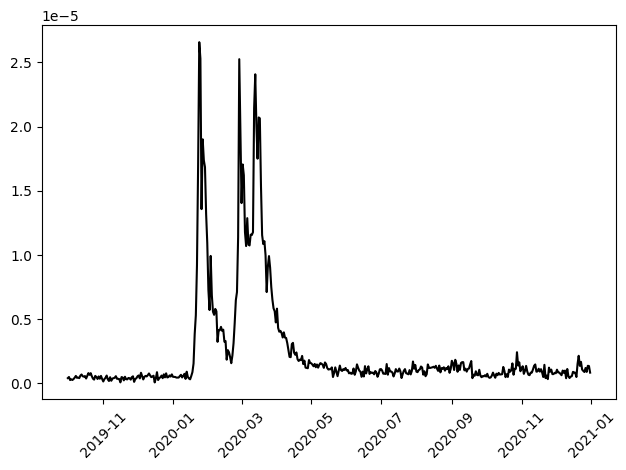

In [175]:
language = 'fr'
game = 'Plague_Inc.'
plt.plot(df_overall_pageviews.index, df_pageviews[(game, language)]/df_overall_pageviews[language], label=language, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

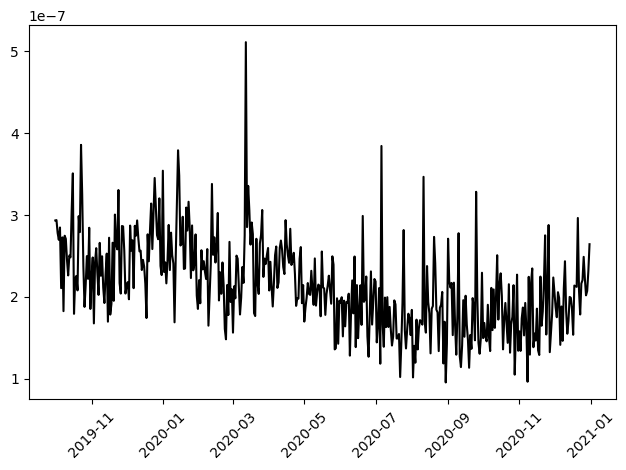

In [177]:
language = 'en'
game = 'Uno'
plt.plot(df_overall_pageviews.index, df_pageviews[(game, language)]/df_overall_pageviews[language], label=language, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis on topic-linked datasets

In [ ]:
# df_topiclinked = pd.read_csv('./Corona/data/topics_linked.csv') #Please use your own data import methods
df_topiclinked = pd.read_csv('topics_linked.csv') #Please use your own data import methods
df_topiclinked.head()

## We first focus on the topic that is related to video games

In [ ]:
video_games_data = df_topiclinked[df_topiclinked['Culture.Media.Video games'] == True]
video_games_data.head()

## Then we focus on the topic linkage to different geographies, which we lead to some basic analysis on the popularity of video games in different geographies.
## In this case, we are able to lead to some introduction of our motivation why we explore the game industry in covid.

In [ ]:
filter_list = [item for item in list(video_games_data.columns) if 'Regions' in item]
video_games_data_filter = video_games_data[video_games_data[filter_list].any(axis=1)]
filter_list.insert(0,'index')
video_games_data_filter = video_games_data_filter.loc[:,filter_list]

video_games_data_filter.set_index('index',inplace=True)
video_games_data_filter = video_games_data_filter.transpose()

count_df = pd.DataFrame(video_games_data_filter.astype(bool).sum(axis=1)).reset_index() # Count the sum of game-linked topics that also have links to different region of the world
df_split = count_df['index'].str.split('.', expand=True).iloc[:,2:]
count_df = pd.concat([df_split,count_df],axis=1)
count_df = count_df.drop(['index'],axis=1)
count_df.columns = ['Region','Sub Region','count']

count_df['Percentage'] = count_df['count']/count_df['count'].sum() # Get the percentage of the topic distribution
count_df.head(n=20)

In [ ]:
count_df_by_region = count_df.groupby('Region').agg({'Percentage':'sum'})
count_df_by_region

Which region is most interested in video games topics?

In [ ]:
# Plot the pit chart by Region
count_df_by_region = count_df.groupby('Region').agg({'Percentage':'sum'})
plt.figure(figsize=(8, 8))
plt.pie(count_df_by_region['Percentage'],labels=count_df_by_region.index, autopct='%1.1f%%', startangle=140,colors = ['gold', 'lightcoral', 'lightskyblue', 'violet', 'lightpink'])
plt.title('Game-linked Topic Distribution by Region')
plt.legend()
plt.show()

In [ ]:
# Plot the pit chart by Sub_region in Europe only
count_df_by_subregion_Europe = count_df[count_df['Region']=='Europe'].groupby('Sub Region').agg({'Percentage':'sum'})
plt.figure(figsize=(8, 8))
plt.pie(count_df_by_subregion_Europe['Percentage'],labels=count_df_by_subregion_Europe.index, autopct='%1.1f%%', startangle=140,colors = ['gold', 'lightcoral', 'lightskyblue', 'violet', 'lightpink'])
plt.title('Game-linked Topic Distribution by Sub Region in Europe')
plt.legend(loc= 'upper right',fontsize = 7)
plt.show()